## Importing Librarires

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import GridSearchCV, cross_val_score,train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, RobustScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,confusion_matrix

## Loading and exploring the Dataset

In [3]:
df = pd.read_csv("MHealthDataset.csv")
df.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,0,subject1


In [4]:
df.shape

(1215745, 14)

In [5]:
df.isna().sum()

alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         0
Activity    0
subject     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215745 entries, 0 to 1215744
Data columns (total 14 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   alx       1215745 non-null  float64
 1   aly       1215745 non-null  float64
 2   alz       1215745 non-null  float64
 3   glx       1215745 non-null  float64
 4   gly       1215745 non-null  float64
 5   glz       1215745 non-null  float64
 6   arx       1215745 non-null  float64
 7   ary       1215745 non-null  float64
 8   arz       1215745 non-null  float64
 9   grx       1215745 non-null  float64
 10  gry       1215745 non-null  float64
 11  grz       1215745 non-null  float64
 12  Activity  1215745 non-null  int64  
 13  subject   1215745 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 129.9+ MB


In [7]:
numeric_columns = ["alx",	"aly",	"alz",
                   "glx",	"gly",	"glz",
                   "arx",	"ary",	"arz",
                   "grx",	"gry",	"grz"]
df_numeric = df[numeric_columns]
df_numeric.describe()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz
count,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06
mean,1.494200e+00,-9.692878e+00,-9.548056e-01,-1.598951e-03,-6.166318e-01,-1.587811e-01,-3.713413e+00,-5.805526e+00,2.393880e+00,-2.761061e-01,-4.664340e-01,2.666335e-01
std,3.826485e+00,4.171303e+00,5.461803e+00,4.912172e-01,3.546406e-01,5.467979e-01,4.763586e+00,5.757639e+00,3.876503e+00,5.276888e-01,5.555510e-01,5.643804e-01
min,-2.214600e+01,-1.961900e+01,-1.937300e+01,-2.146600e+00,-7.789900e+00,-2.626700e+00,-2.236100e+01,-1.897200e+01,-1.823900e+01,-8.339200e+00,-3.570800e+00,-2.689700e+00
25%,1.413100e-01,-1.020100e+01,-2.649400e+00,-4.359900e-01,-8.180100e-01,-5.933200e-01,-6.076000e+00,-9.404200e+00,1.296500e-01,-7.058800e-01,-8.973300e-01,-2.370700e-01
50%,1.308900e+00,-9.670300e+00,-1.645600e-02,-1.484200e-02,-7.073200e-01,-1.905700e-01,-2.977600e+00,-7.461500e+00,1.928100e+00,-3.549000e-01,-6.345000e-01,3.017200e-01
75%,2.575800e+00,-9.042200e+00,1.301300e+00,4.489800e-01,-5.403400e-01,3.222000e-01,-1.193700e+00,-2.533900e+00,4.914700e+00,9.607800e-02,-1.067800e-01,7.780200e-01
max,2.005400e+01,2.116100e+01,2.501500e+01,6.048400e+01,2.011300e+00,2.770100e+00,1.986400e+01,2.219100e+01,2.574100e+01,3.319600e+00,1.556500e+00,2.750000e+00


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
#the labels of the activities
Activity_map = {
    0: 'Nothing',
    1: 'Standing still',
    2: 'Sitting and relaxing',
    3: 'Lying down',
    4: 'Walking',
    5: 'Climbing stairs',
    6: 'Waist bends forward',
    7: 'Frontal elevation of arms',
    8: 'Knees bending (crouching)',
    9: 'Cycling',
    10: 'Jogging',
    11: 'Running',
    12: 'Jump front & back'
}

## Plotting the readings of sensors on the Ankle and Wrist

Activity: Standing still   Accelerator 


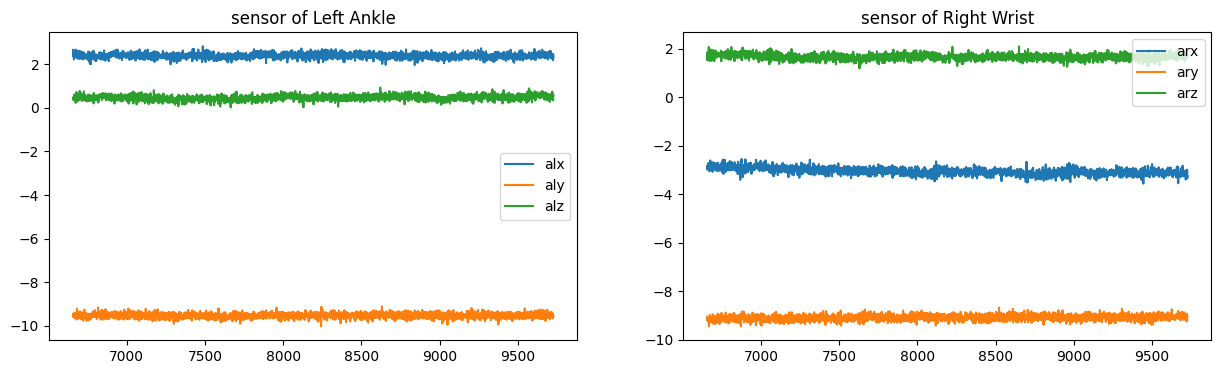

Activity: Standing still   Gyroscope 


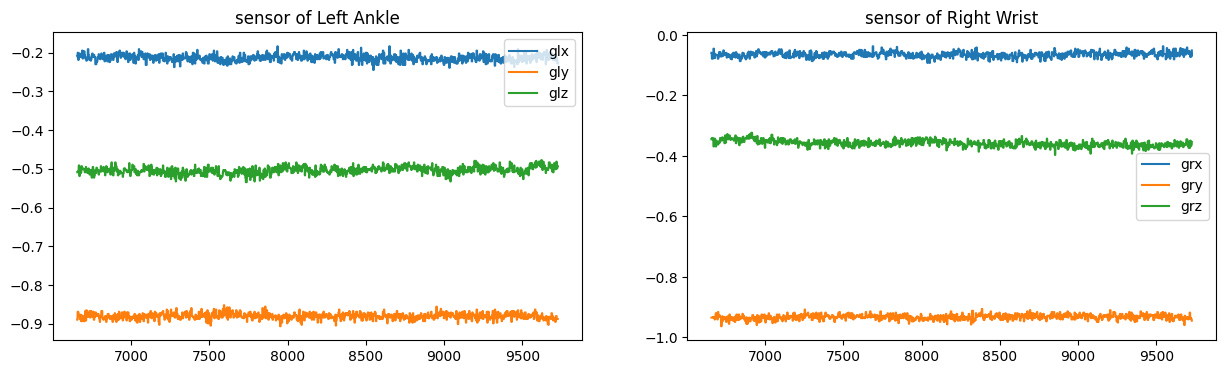

Activity: Sitting and relaxing   Accelerator 


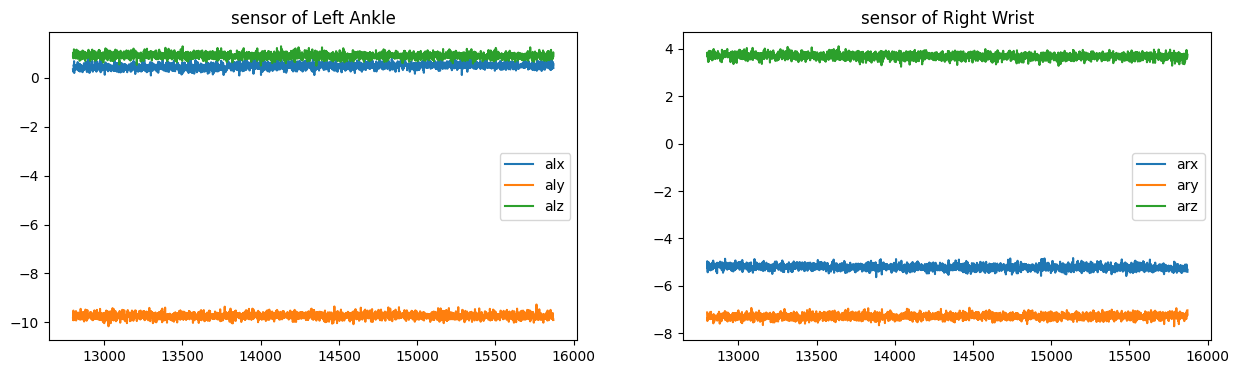

Activity: Sitting and relaxing   Gyroscope 


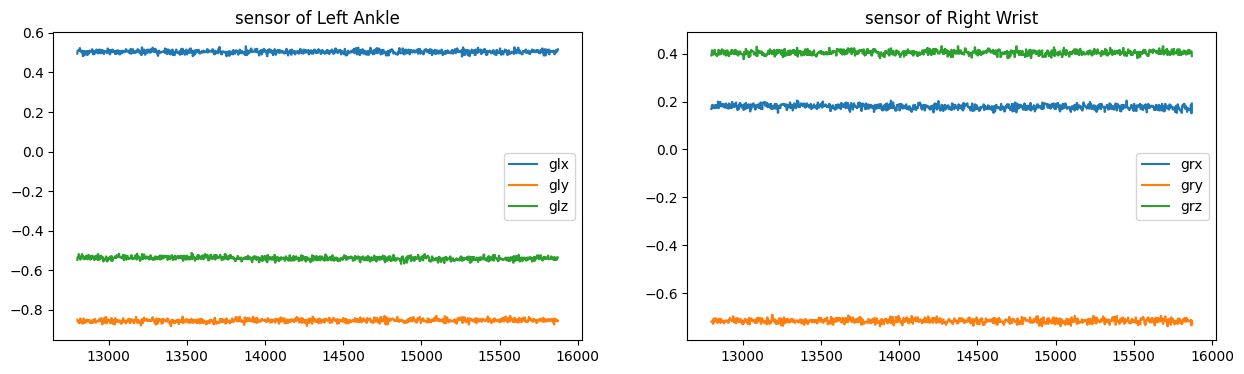

Activity: Lying down   Accelerator 


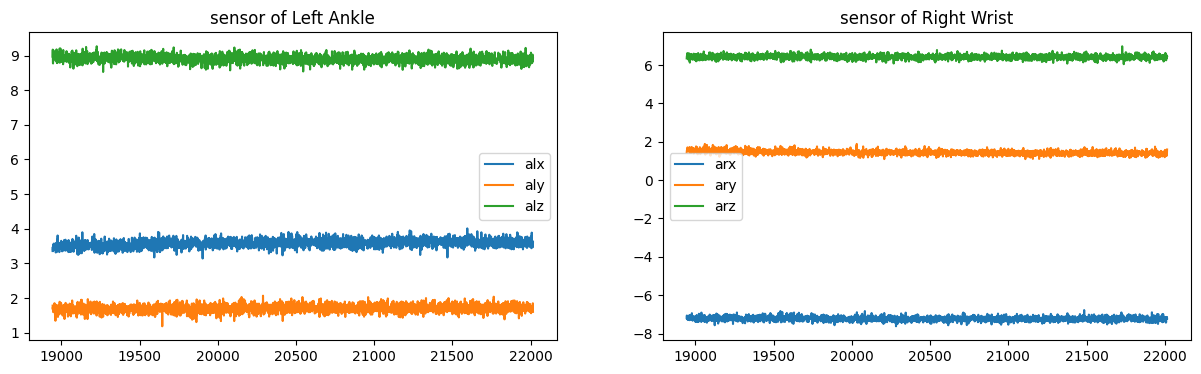

Activity: Lying down   Gyroscope 


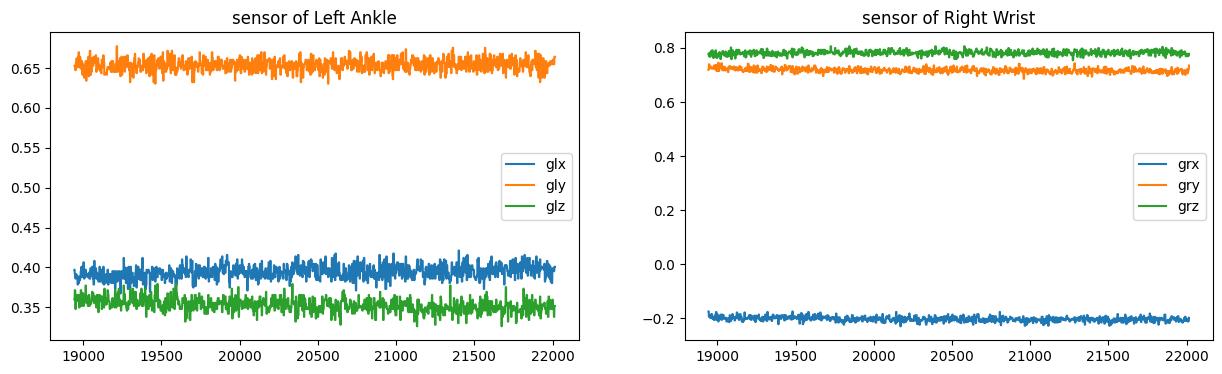

Activity: Walking   Accelerator 


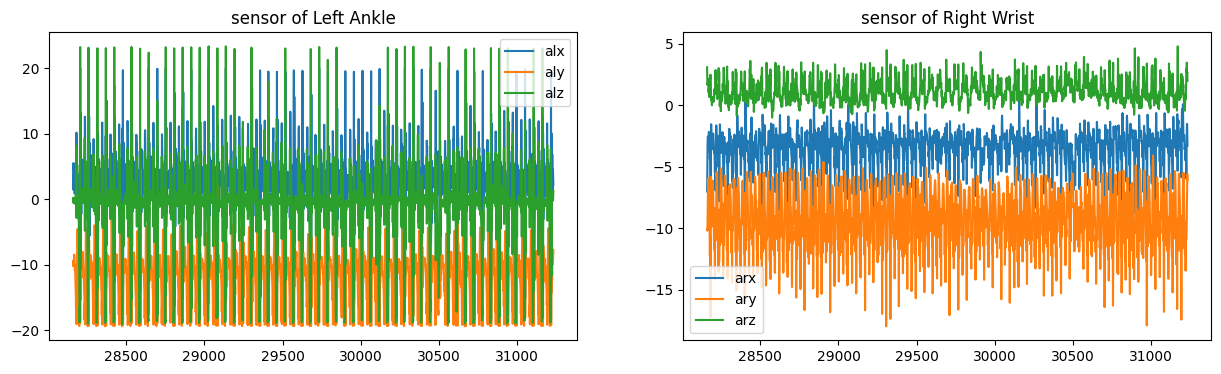

Activity: Walking   Gyroscope 


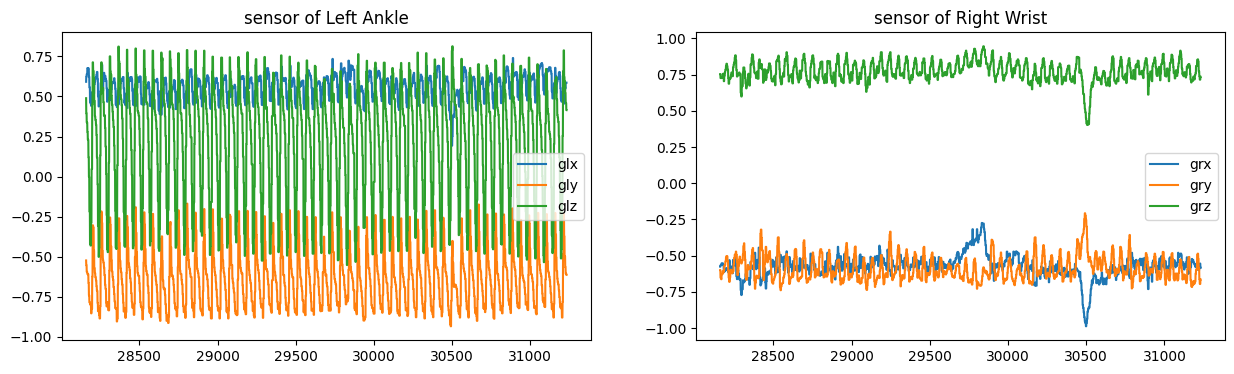

Activity: Climbing stairs   Accelerator 


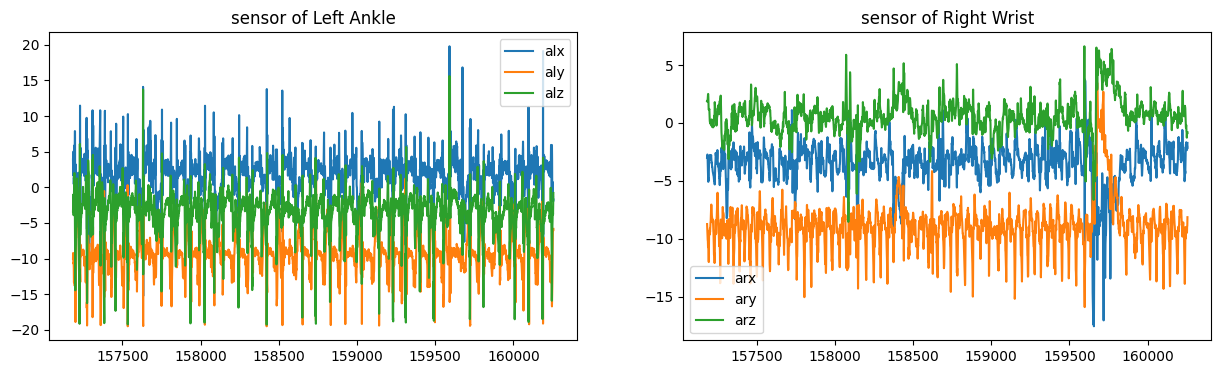

Activity: Climbing stairs   Gyroscope 


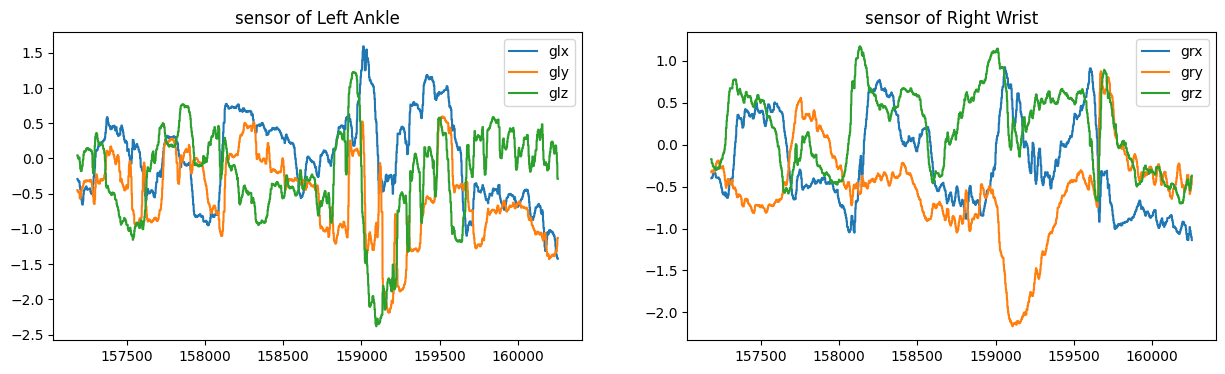

Activity: Waist bends forward   Accelerator 


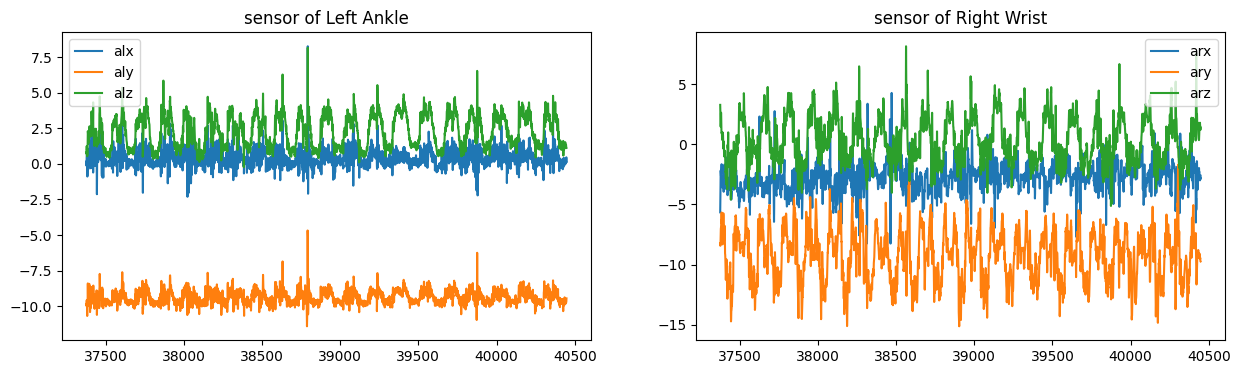

Activity: Waist bends forward   Gyroscope 


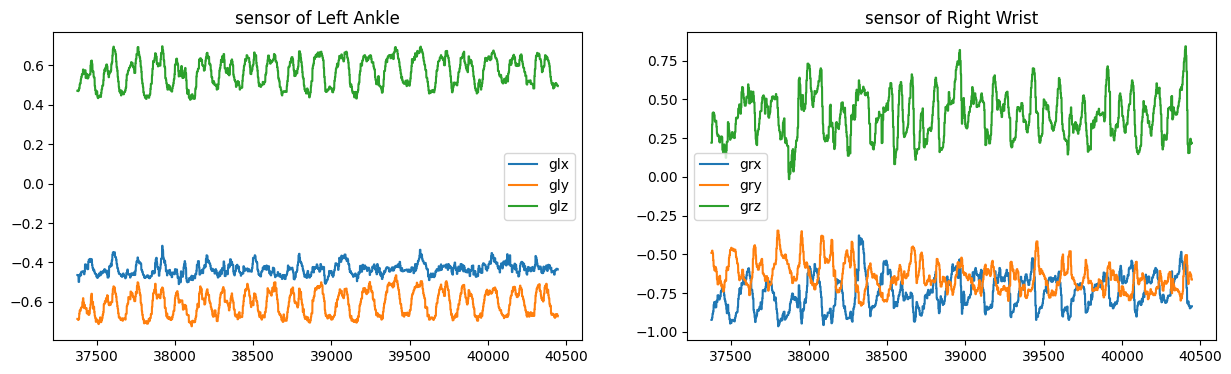

Activity: Frontal elevation of arms   Accelerator 


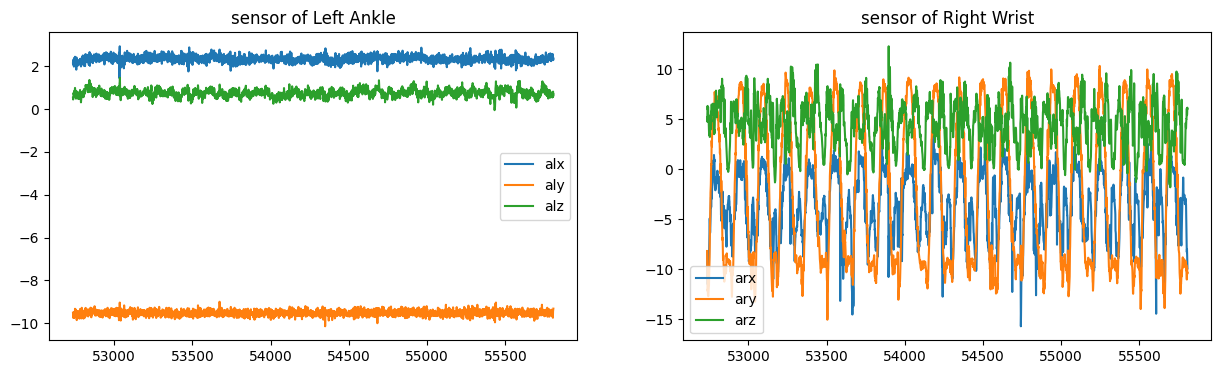

Activity: Frontal elevation of arms   Gyroscope 


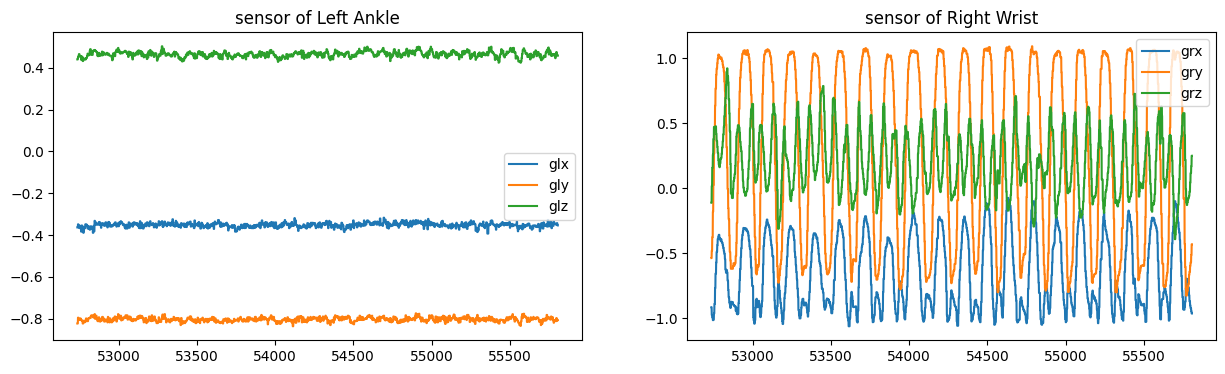

Activity: Knees bending (crouching)   Accelerator 


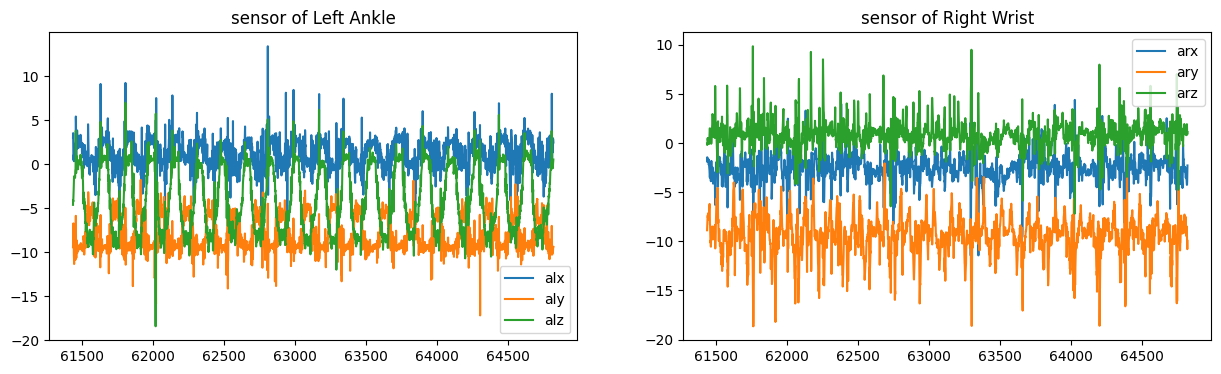

Activity: Knees bending (crouching)   Gyroscope 


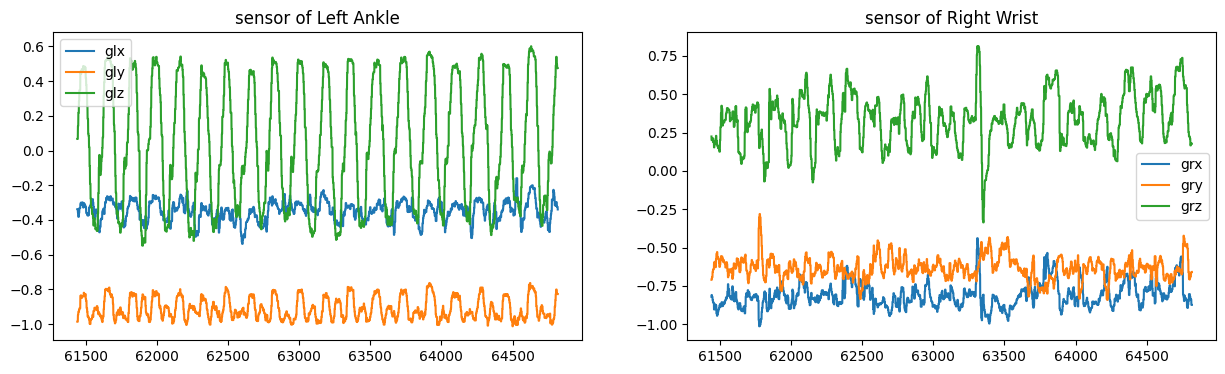

Activity: Cycling   Accelerator 


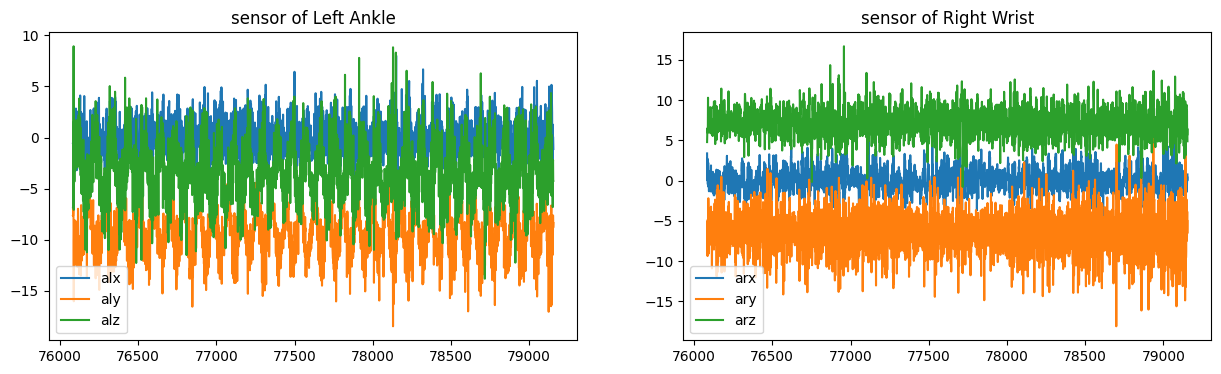

Activity: Cycling   Gyroscope 


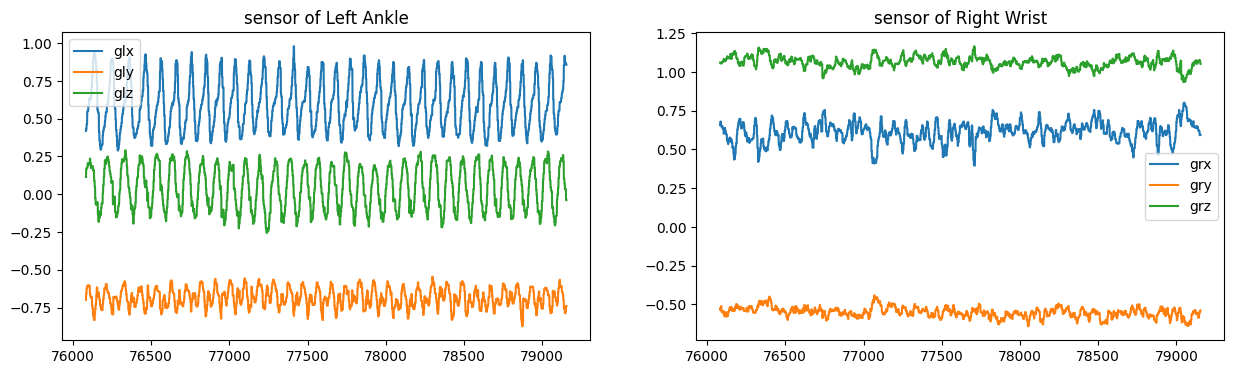

Activity: Jogging   Accelerator 


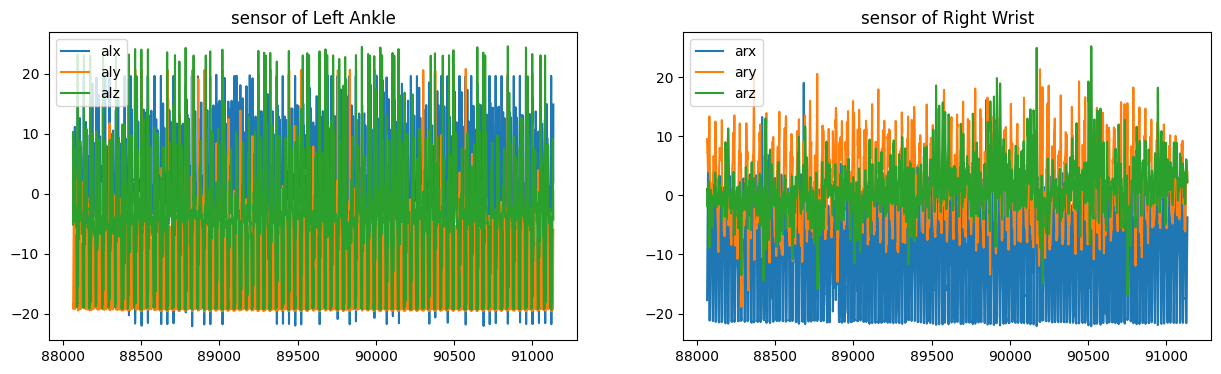

Activity: Jogging   Gyroscope 


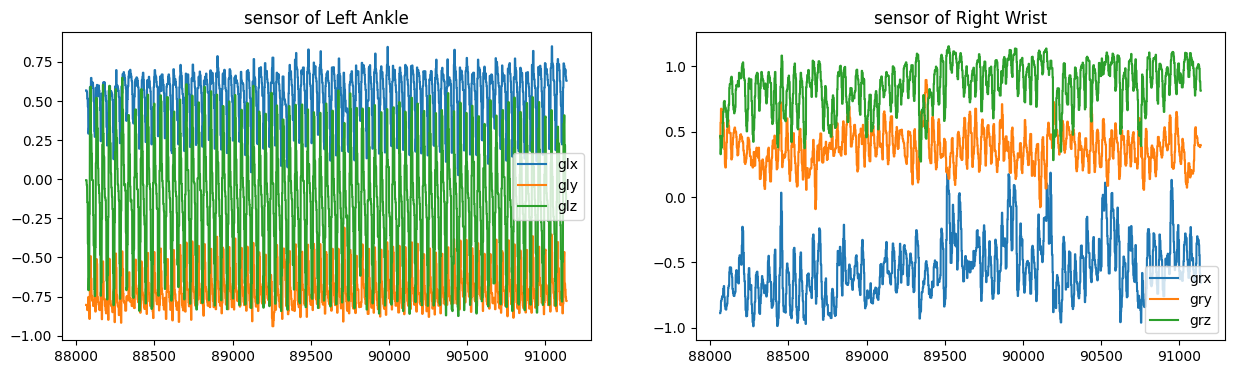

Activity: Running   Accelerator 


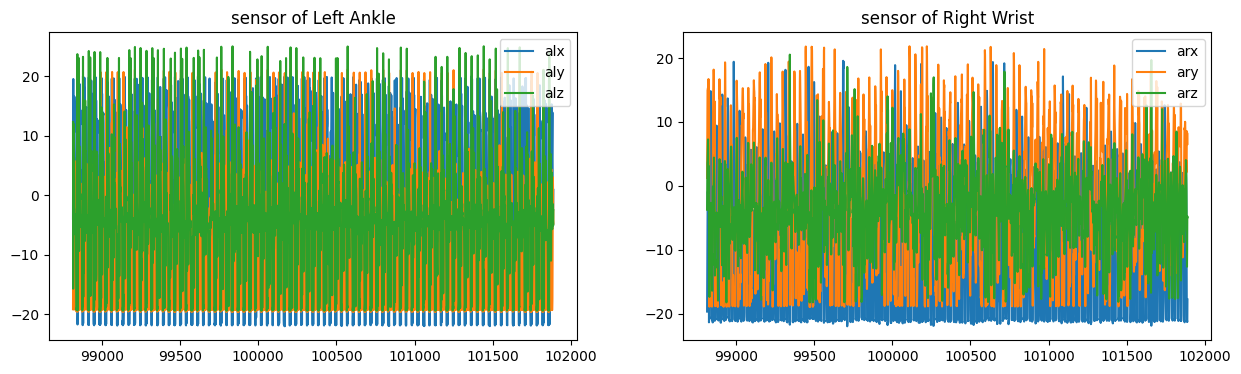

Activity: Running   Gyroscope 


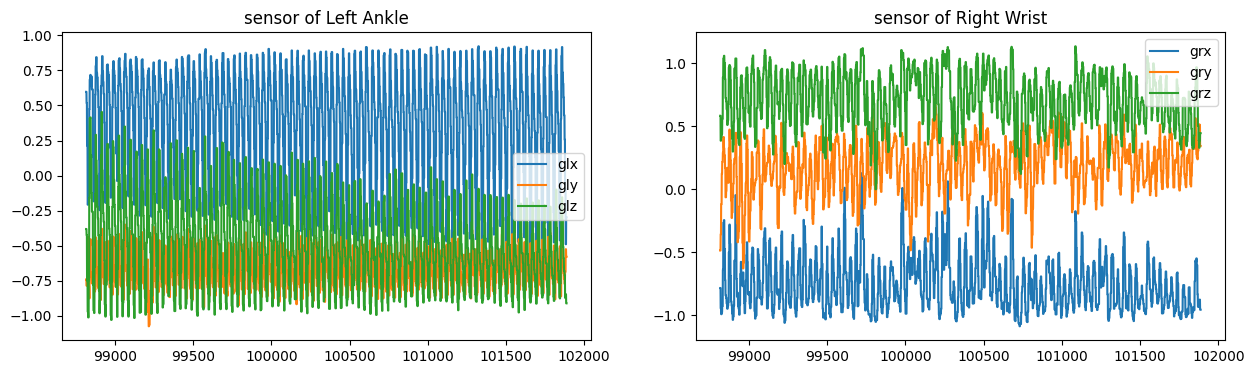

Activity: Jump front & back   Accelerator 


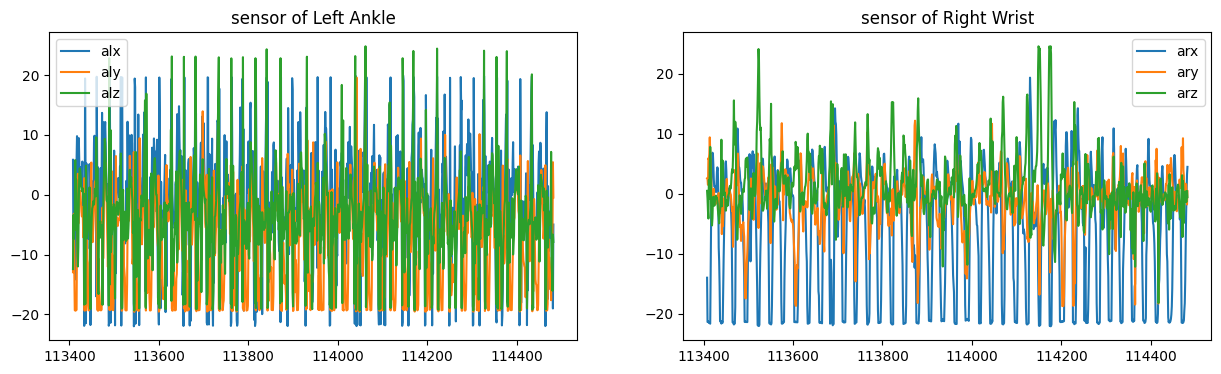

Activity: Jump front & back   Gyroscope 


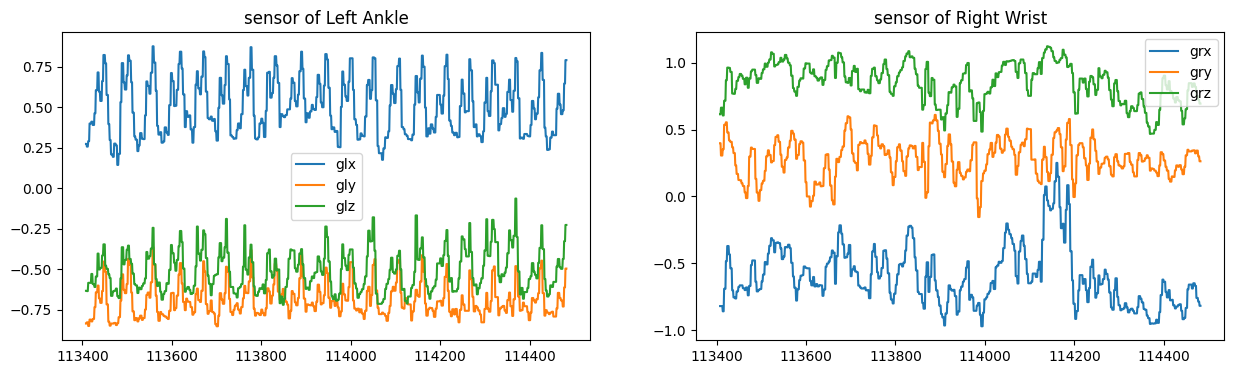

In [10]:
#plotting the readings of the accelometer and the gyroscope for one volunteer
vol_1 = df[df["subject"] == "subject1"]
results = ['a',"g"]

for i in range(1,13):#skip nothing from plotting
  for j in results:
    print(f"Activity: {Activity_map[i]}   {'Accelerator' if j == 'a' else 'Gyroscope'} ")
    #left accelerator and gyroscope
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    plt.plot(vol_1[vol_1['Activity']==i][j + 'lx'], label= j + 'lx')
    plt.plot(vol_1[vol_1['Activity']==i][j + 'ly'], label= j + 'ly')
    plt.plot(vol_1[vol_1['Activity']==i][j + 'lz'], label= j + 'lz')
    plt.title("sensor of Left Ankle")
    plt.legend()
    #right accelerator and gyroscope
    plt.subplot(1,2,2)
    plt.plot(vol_1[vol_1['Activity']==i][j + 'rx'], label= j + 'rx')
    plt.plot(vol_1[vol_1['Activity']==i][j + 'ry'], label= j + 'ry')
    plt.plot(vol_1[vol_1['Activity']==i][j + 'rz'], label= j + 'rz')
    plt.title("sensor of Right Wrist")
    plt.legend()
    plt.show()

## Box plot to see outliers

In [11]:
# plt.figure(figsize=(10, 6))

# sns.boxplot(data=df_numeric)
# plt.show();

In [12]:
no_classes = df["Activity"].value_counts()
no_classes

Activity
0     872550
1      30720
2      30720
3      30720
4      30720
9      30720
5      30720
11     30720
10     30720
7      29441
8      29337
6      28315
12     10342
Name: count, dtype: int64

In [13]:
no_classes = df["Activity"].value_counts()

columns_2_train = ["alx",	"aly",	"alz",
                   "glx",	"gly",	"glz",
                   "arx",	"ary",	"arz",
                   "grx",	"gry",	"grz","Activity"]

#sampling the data with the min Activity classes
rows_per_class = 10342

def sampling(overall_size):
    activity_counts = df['Activity'].value_counts()
    min_count = activity_counts.min()
    df_balanced = df.groupby('Activity').apply(lambda x: x.sample(min_count)).reset_index(drop=True)
    return df_balanced.sample(overall_size * 13)

sampled_data = sampling(rows_per_class)

sampled_data = sampled_data[columns_2_train]

sampled_data.head()

C:\Users\91797\AppData\Local\Temp\ipykernel_7628\3019955176.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df.groupby('Activity').apply(lambda x: x.sample(min_count)).reset_index(drop=True)


,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity
82294,-0.007177,-9.7546,1.77260,-0.43043,-0.57036,0.60314,2.8409,-9.3691,0.094047,-0.38824,-1.00210,0.056034,7
47812,-4.638800,-12.0530,0.60094,-0.10761,-0.95872,-0.17682,-4.0684,-7.7979,2.214300,-0.38627,-0.98563,-0.202590,4
52023,1.083900,-0.9175,0.32955,0.71058,-0.66979,-0.46955,-1.0880,-7.9176,-0.760460,-0.37451,-0.80082,0.784480,5
108505,2.559100,-19.1560,8.18240,0.48237,-0.72045,0.34971,-17.0890,-6.4223,-9.227400,-0.96863,-0.27926,0.362070,10
85466,3.122900,-5.6808,-7.67990,0.79777,-0.25141,-0.60511,-2.0857,-11.5460,-0.629400,-0.13725,-0.76591,0.866380,8


## Splitting The Data to Train the Models

In [14]:
X = sampled_data.iloc[:,:-1]
y = sampled_data.iloc[:,-1]
y.shape

(134446,)

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train).reshape(-1,1)

X_test = np.asarray(X_test)
y_test = np.asarray(y_test).reshape(-1,1)

In [16]:
X_train.shape

(107556, 12)

In [17]:
y_train.shape

(107556, 1)

In [18]:
y_train

array([[ 7],
       [ 7],
       [12],
       ...,
       [ 3],
       [ 9],
       [ 8]])

In [19]:
robust = RobustScaler()
robust.fit(X_train)
X_train_scaled = robust.transform(X_train)
X_test_scaled = robust.transform(X_test)

In [20]:
df2 = sampling(6000)

X_cross = df2.iloc[:,:-2]
y_cross = df2.iloc[:,-2]

C:\Users\91797\AppData\Local\Temp\ipykernel_7628\3019955176.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df.groupby('Activity').apply(lambda x: x.sample(min_count)).reset_index(drop=True)


In [21]:
def model_Evaluation(y_test,y_model_pred):
  conf_mat = confusion_matrix(y_test,y_model_pred)
  threshold = 1
  binary_cm = np.where(conf_mat > threshold, 1, 0)
  accuracy = accuracy_score(y_test,y_model_pred)
  precision = precision_score(y_test,y_model_pred,average="macro")
  recal = recall_score(y_test,y_model_pred,average="macro")
  f1 = f1_score(y_test,y_model_pred,average="macro")

  plt.figure(figsize=(13,5))
  sns.heatmap(binary_cm,cmap= "Purples",annot=True,xticklabels=Activity_map.values(),yticklabels=Activity_map.values())
  plt.title("Confusion Matrix")
  plt.xlabel("Activities")
  plt.ylabel("Activities")
  plt.show()

  print("Accuracy: ",accuracy * 100,"\n",
        "Precsion: ",precision*100,"\n",
        "Recall: ",recal*100,"\n",
        "F1_Score: ",f1*100,"\n")

## Logistic Regression

In [33]:
# lr_param_grid = {"C":[1]}

# lr_grid_search = GridSearchCV(LogisticRegression(), lr_param_grid, cv=5, scoring='accuracy')
# lr_grid_search.fit(X_train, y_train)
# lr_best_score = lr_grid_search.best_score_
# lr_best_params = lr_grid_search.best_params_
# print("Best Parameters for LR:", lr_best_params)

In [34]:
lr = LogisticRegression(C=6)

In [35]:
lr.fit(X_train,y_train)
y_lr_pred = lr.predict(X_test)

D:\Python 311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Python 311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


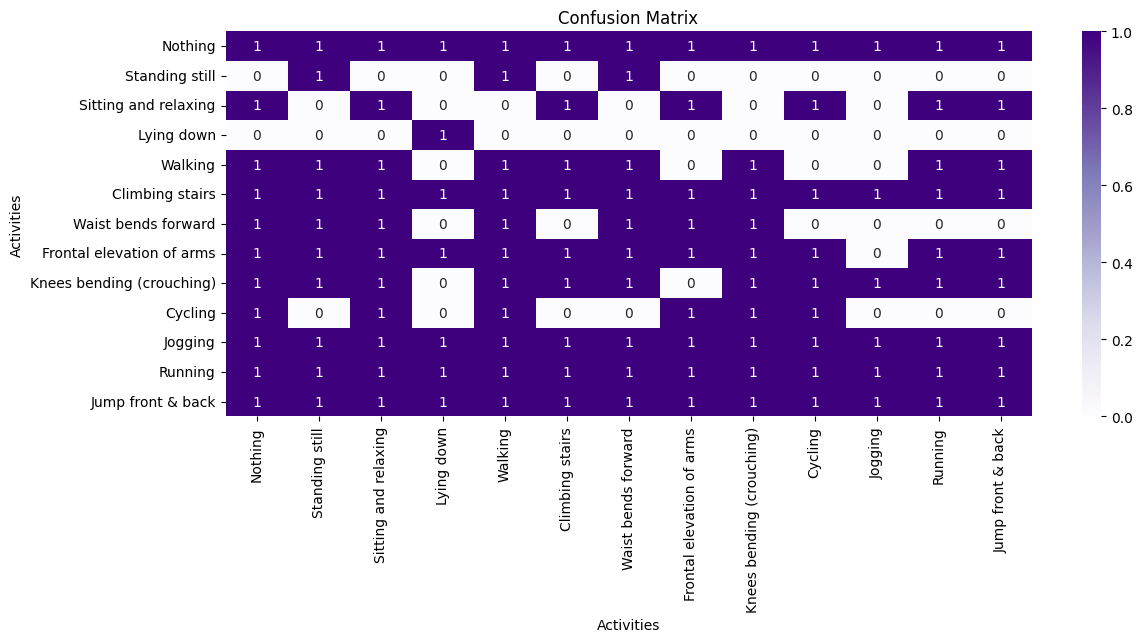

Accuracy:  54.656005950167355 
 Precsion:  52.20458776179837 
 Recall:  54.60705302516063 
 F1_Score:  52.74233178235727 



In [36]:
model_Evaluation(y_test,y_lr_pred)

## SVM

In [28]:
# svm_model = SVC()
# svm_param_grid = {'C': [1,2,3,4,5,6,7,8,9,10,11]}
# grid_search = GridSearchCV(estimator=svm_model, param_grid=svm_param_grid, cv=5)
# grid_search.fit(X_cross, y_cross)

# print("Best Parameters for SVM:", grid_search.best_params_)

In [29]:
svm = SVC(kernel="rbf",C=10)

In [31]:
svm.fit(X_train_scaled,y_train)
y_svm_pred = svm.predict(X_test_scaled)

D:\Python 311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


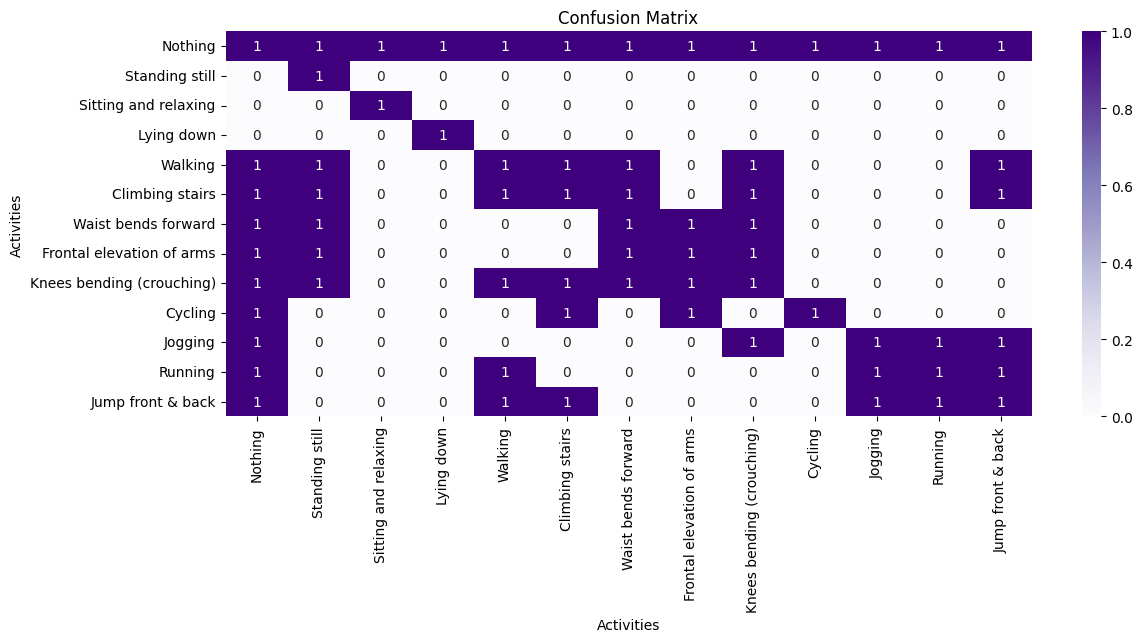

Accuracy:  92.68501301599107 
 Precsion:  92.4161322621558 
 Recall:  92.66047727762154 
 F1_Score:  92.23103721749948 



In [32]:
model_Evaluation(y_test,y_svm_pred)

## KNN

In [25]:
knn = KNeighborsClassifier(n_neighbors=3)

In [26]:
knn.fit(X_train_scaled,y_train)
y_knn_pred = knn.predict(X_test_scaled)

D:\Python 311\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


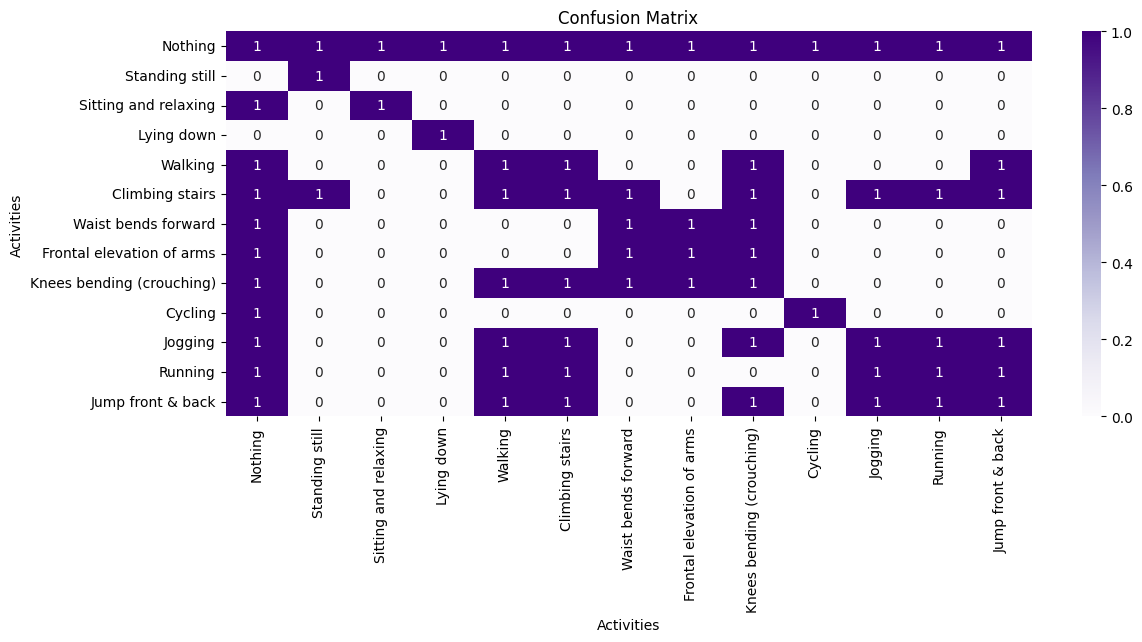

Accuracy:  93.12755671253254 
 Precsion:  93.0318910230775 
 Recall:  93.09498162313159 
 F1_Score:  92.76177427355367 



In [27]:
model_Evaluation(y_test,y_knn_pred)